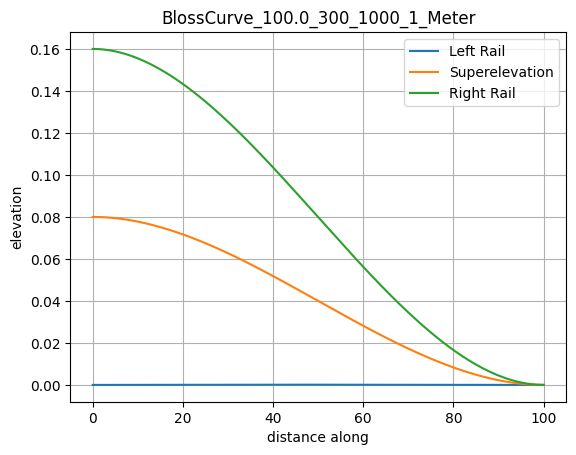

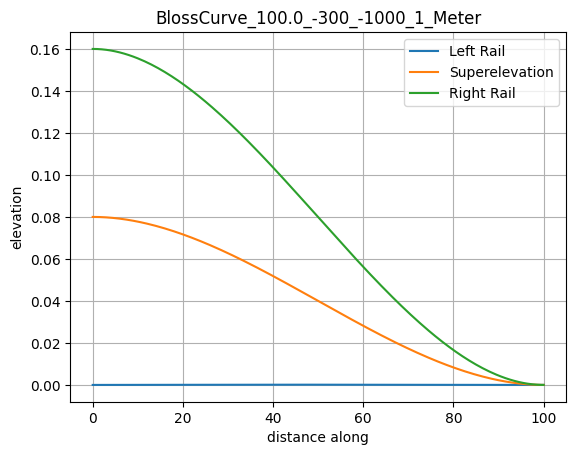

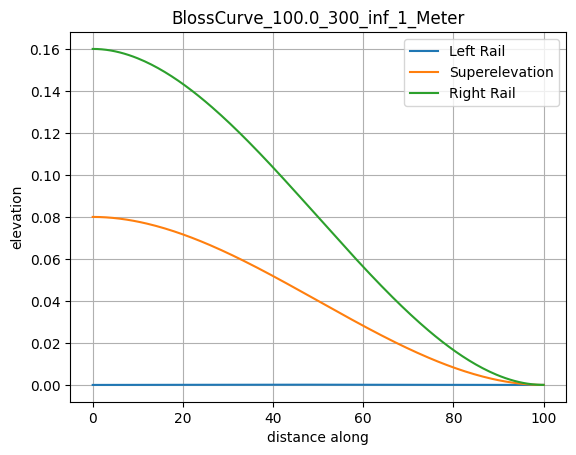

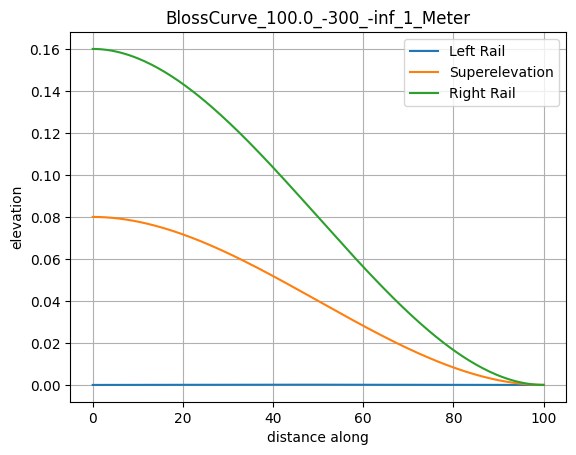

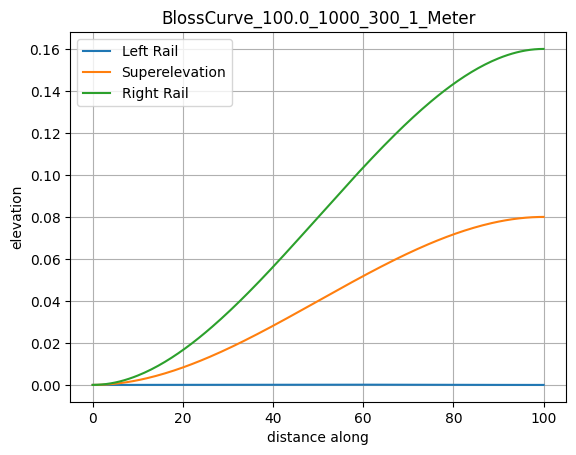

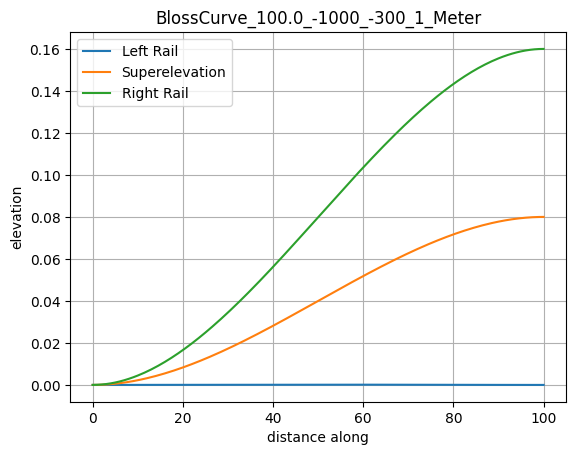

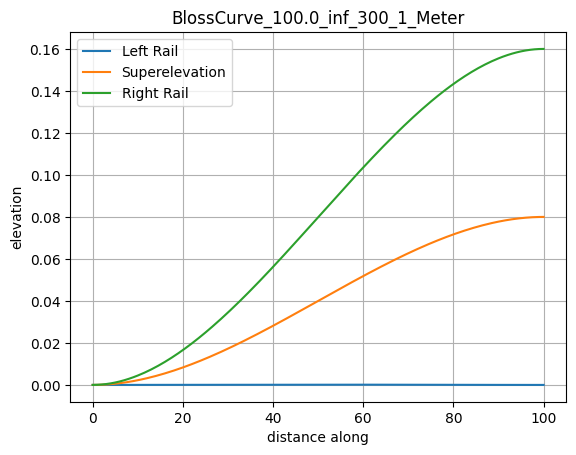

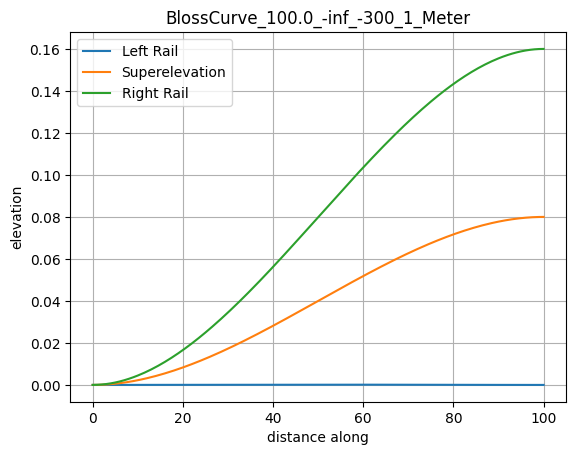

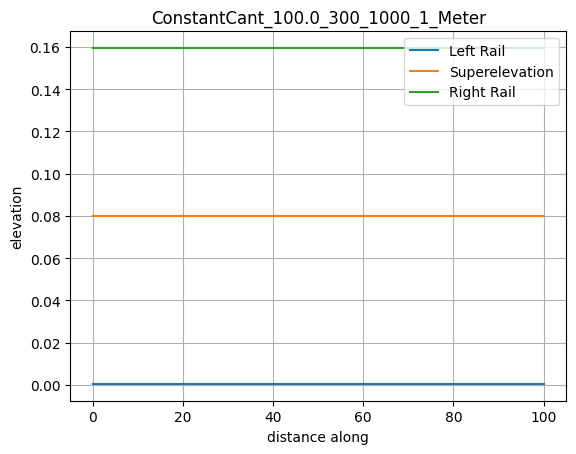

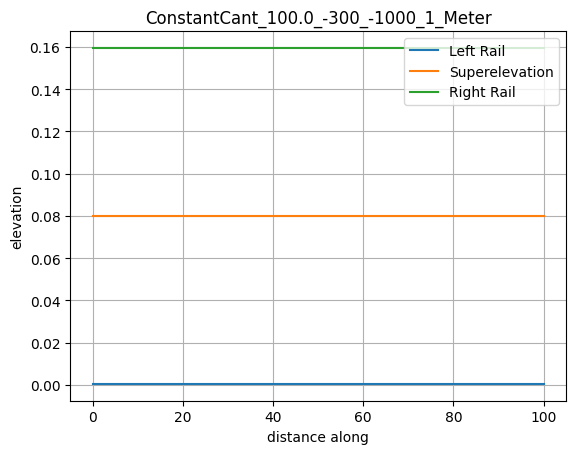

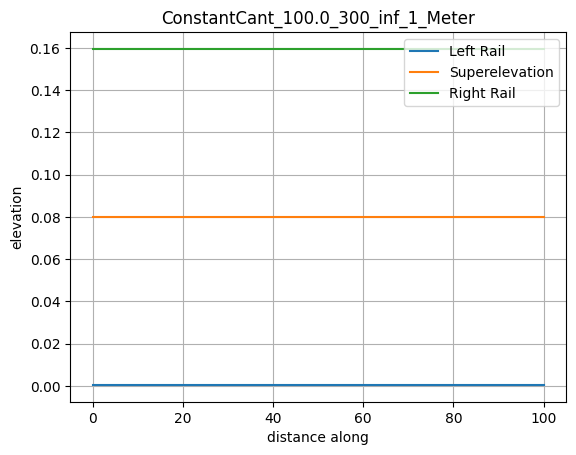

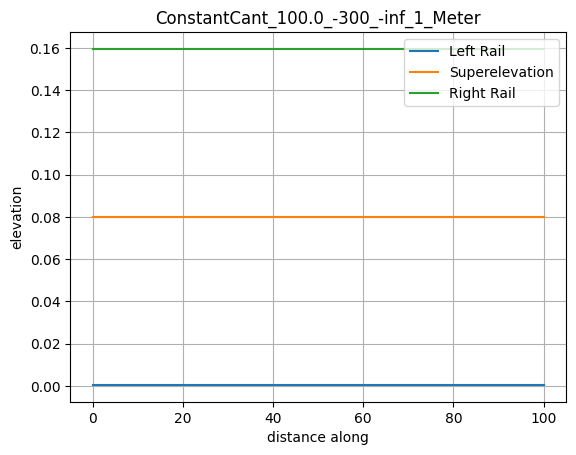

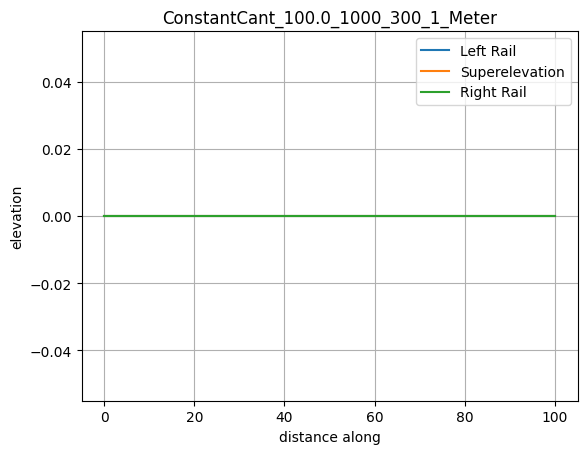

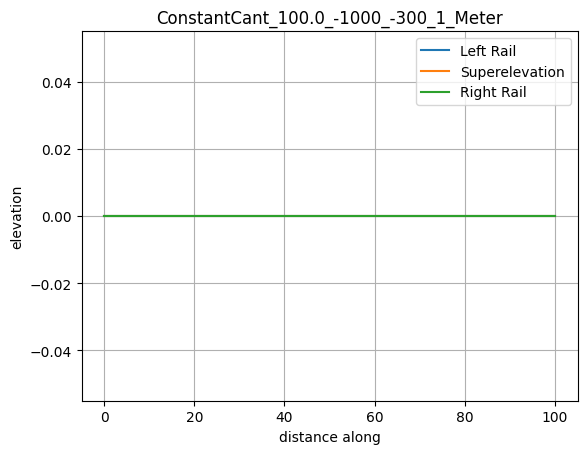

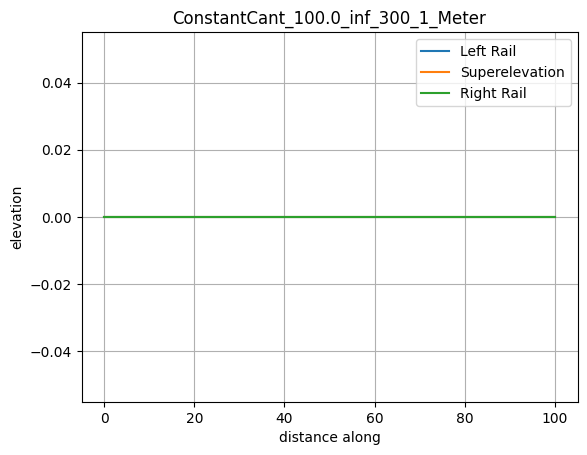

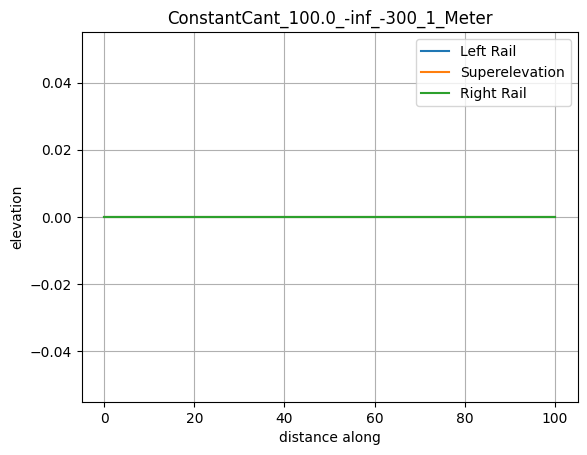

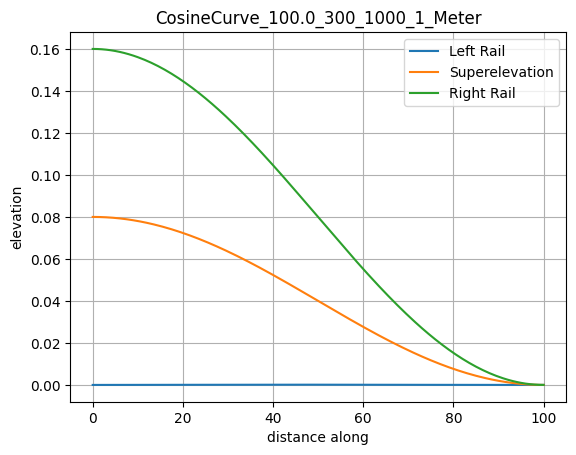

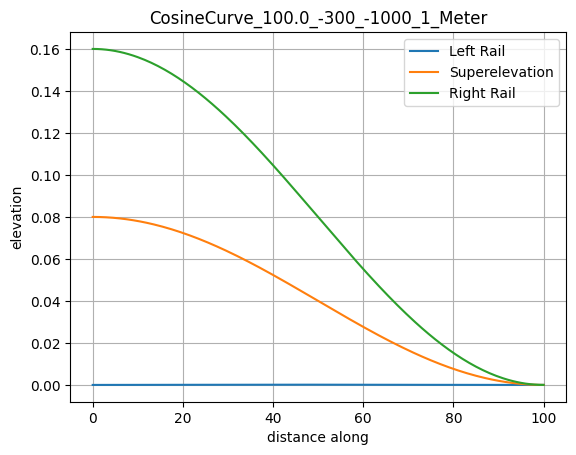

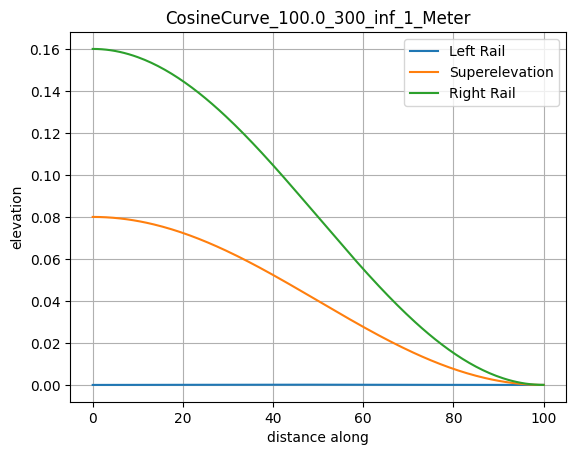

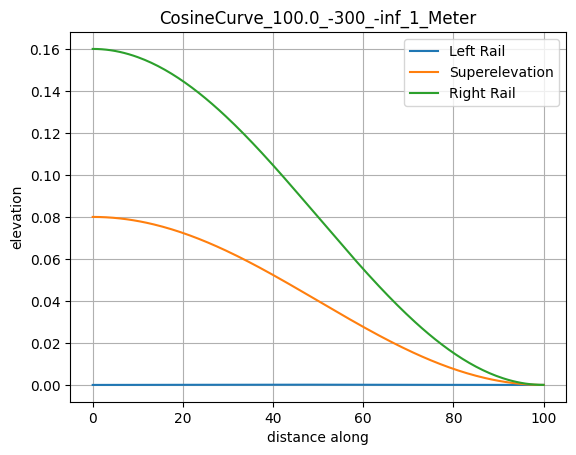

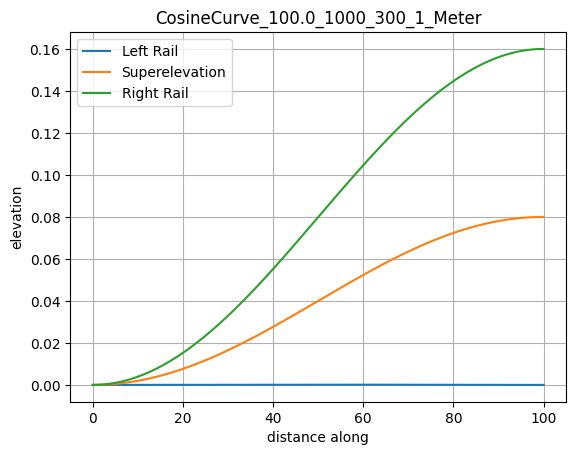

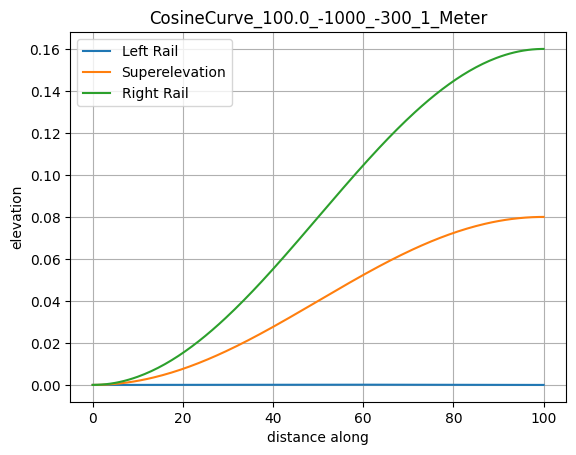

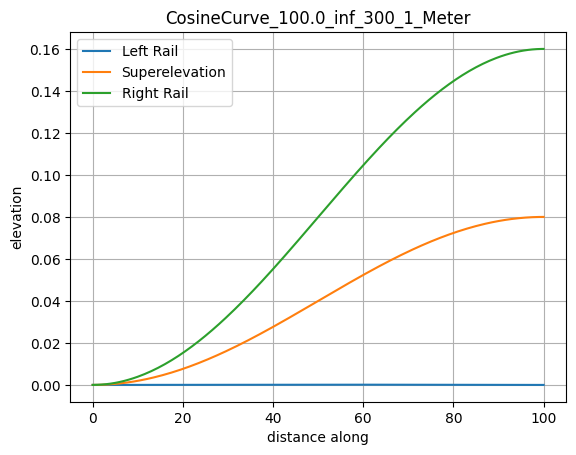

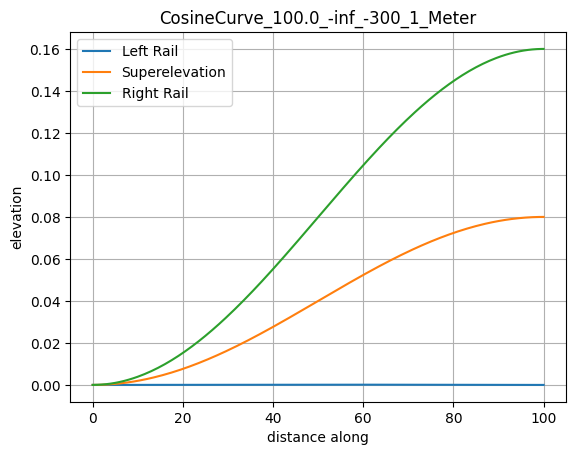

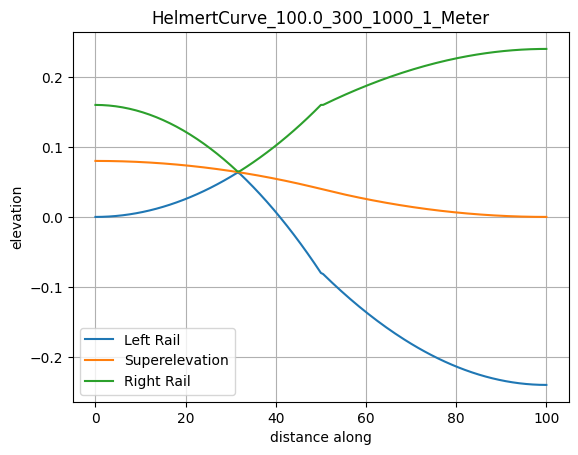

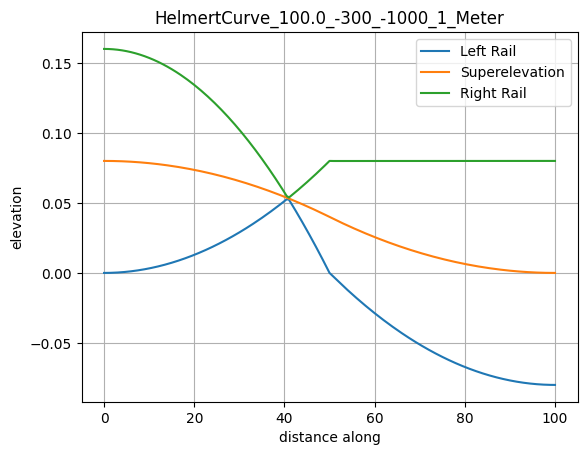

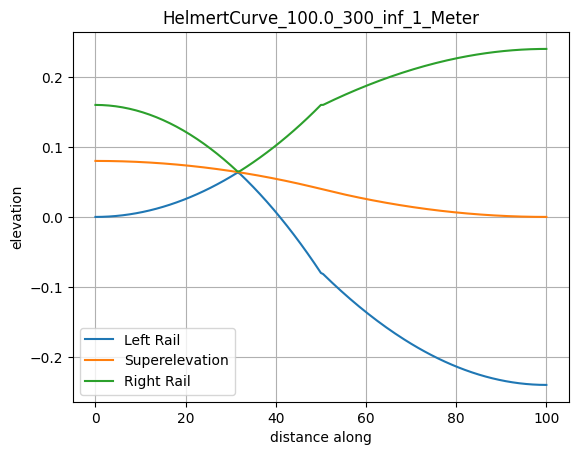

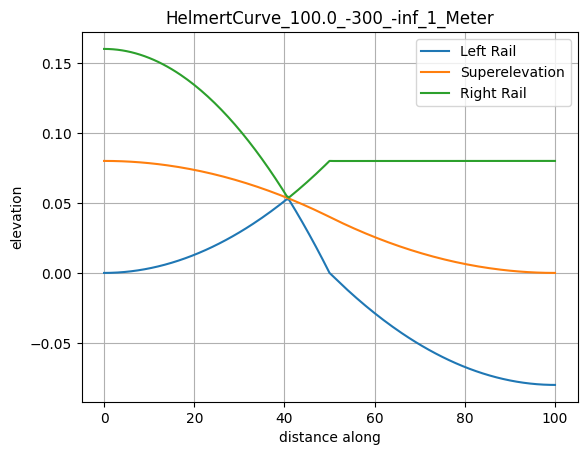

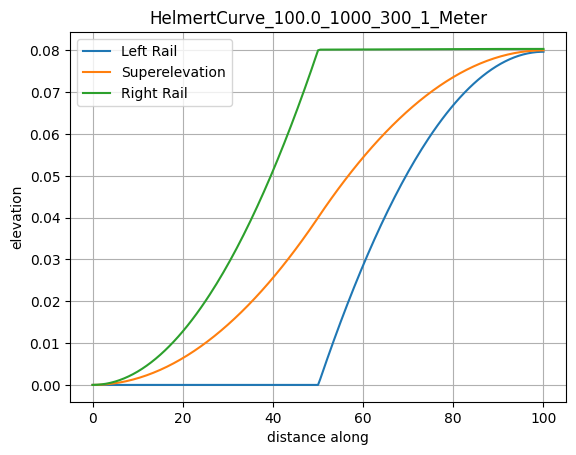

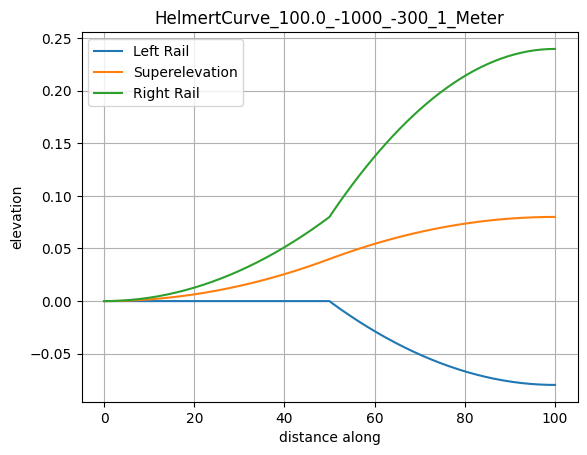

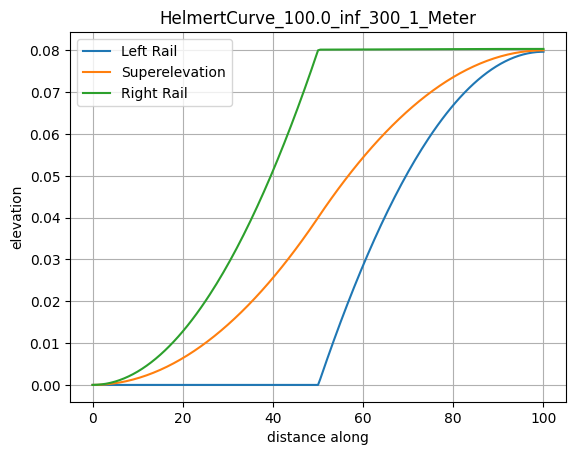

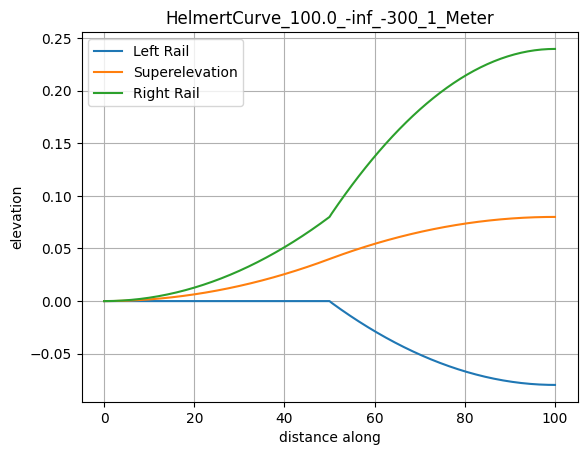

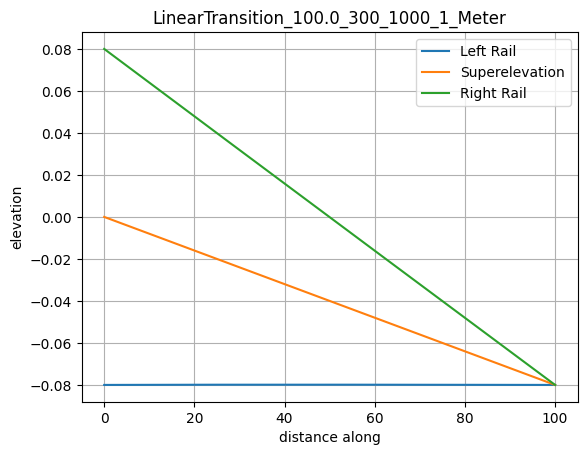

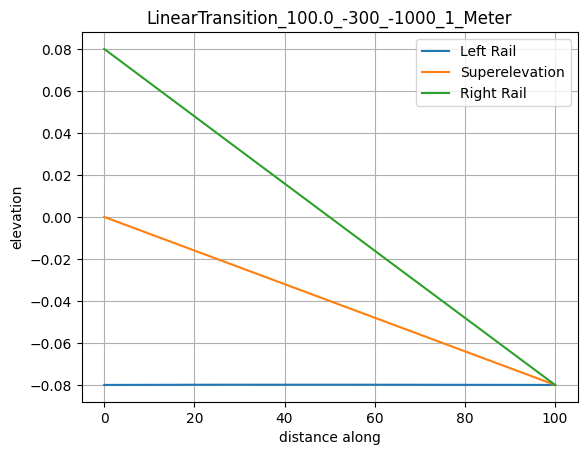

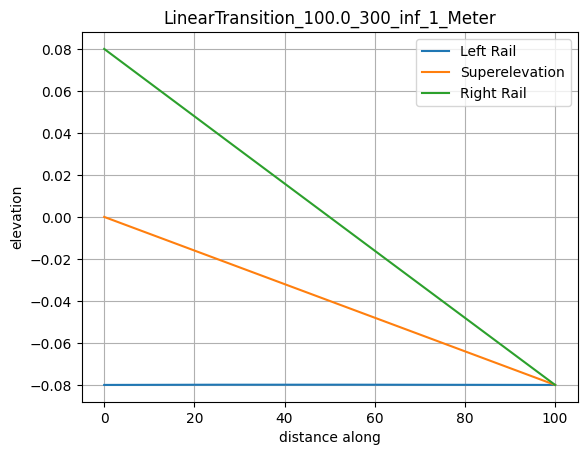

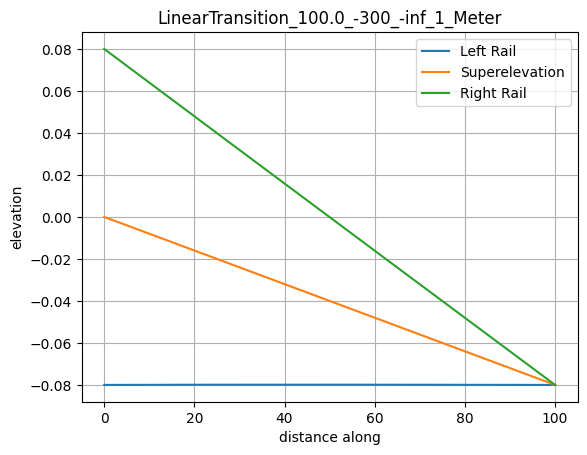

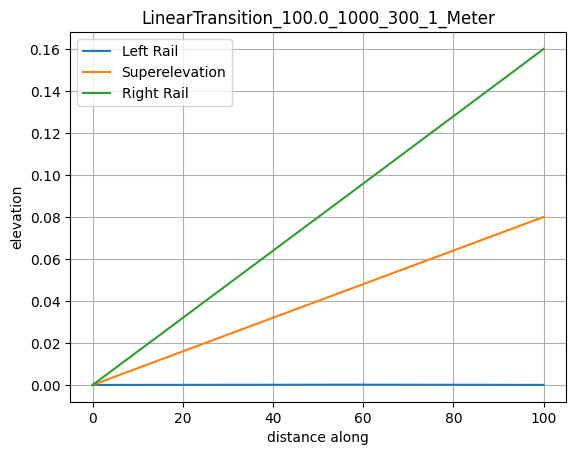

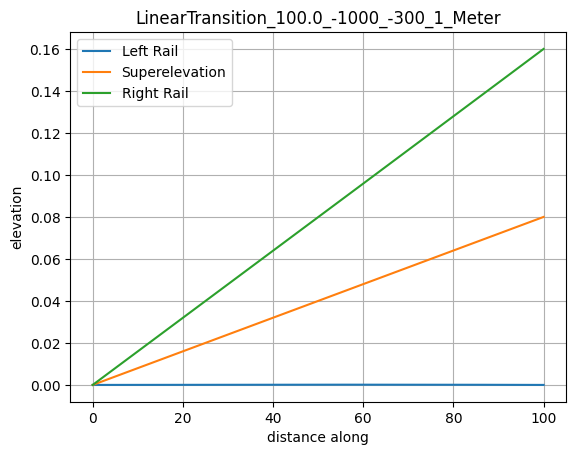

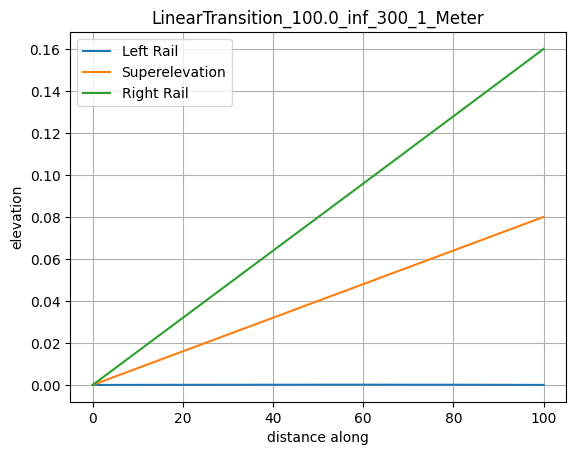

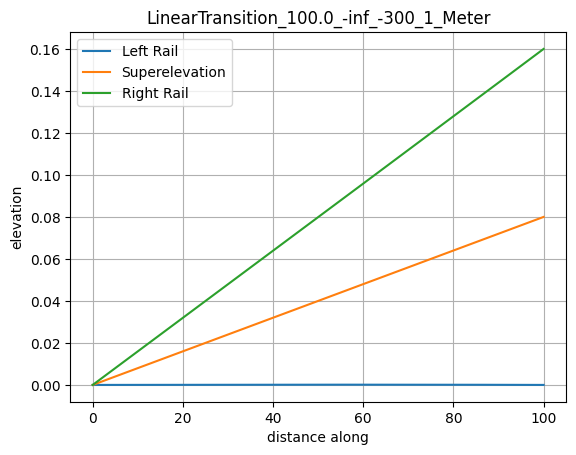

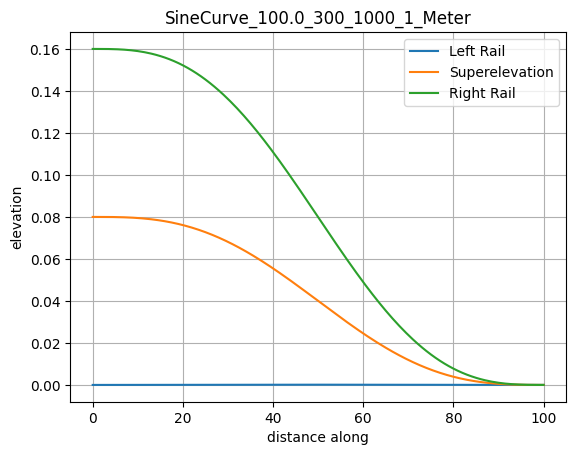

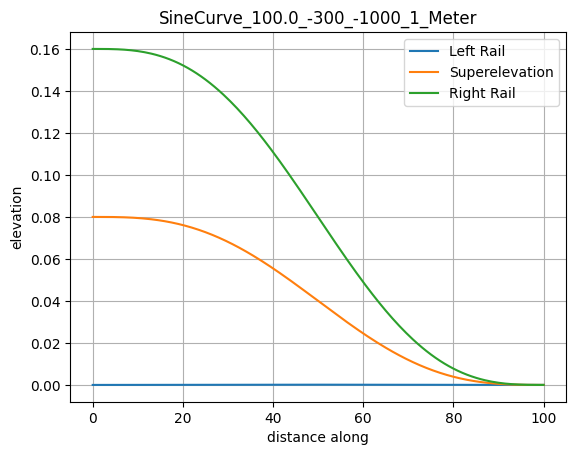

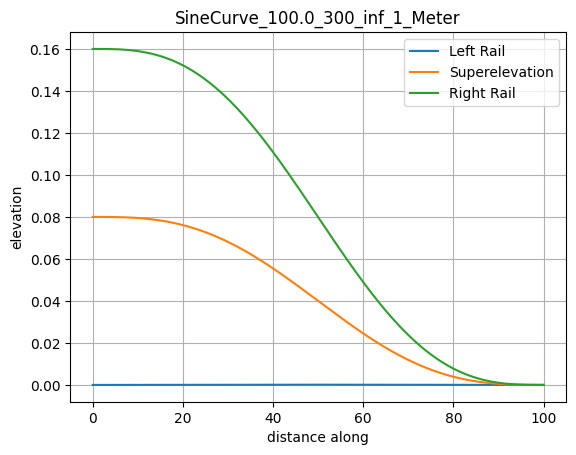

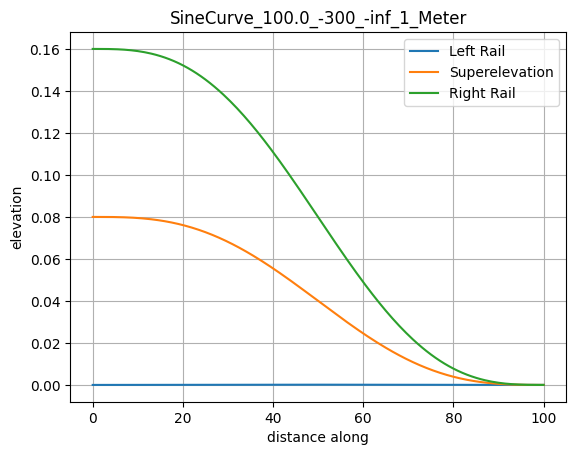

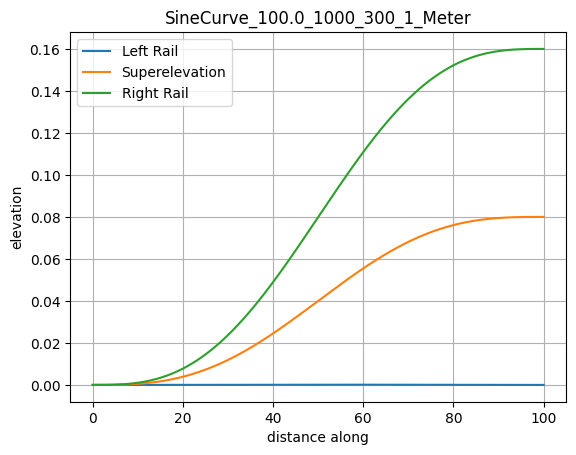

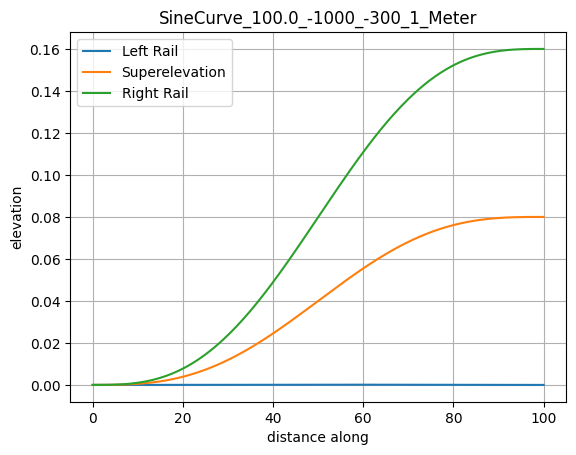

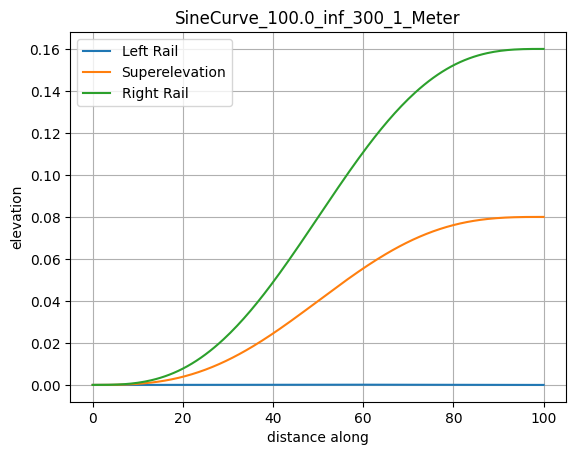

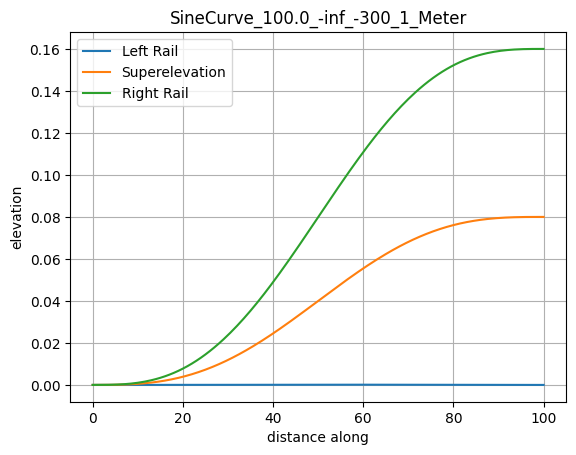

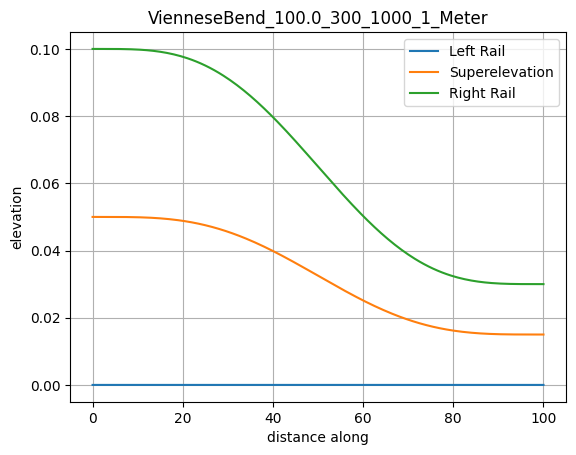

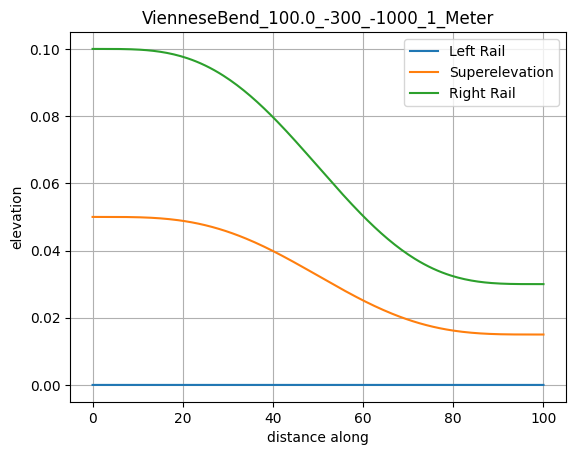

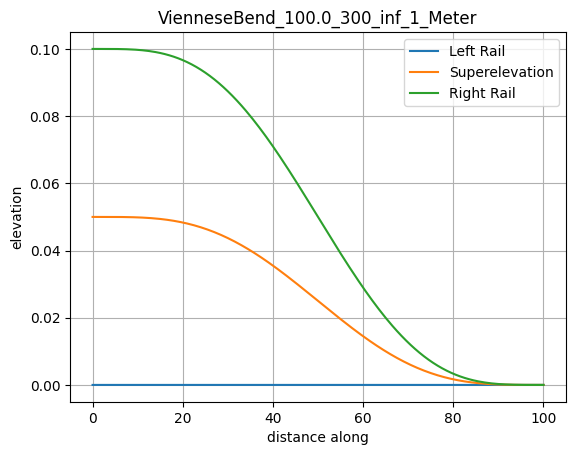

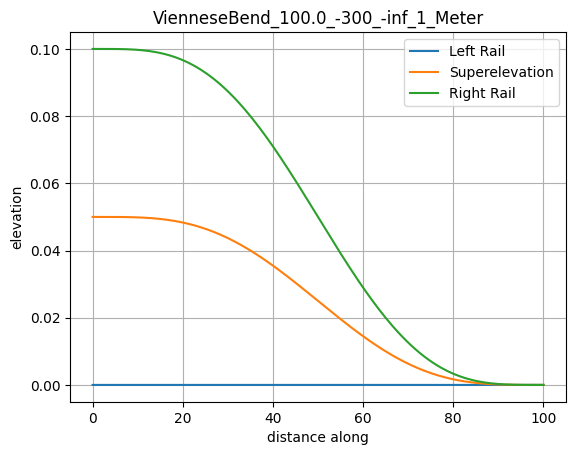

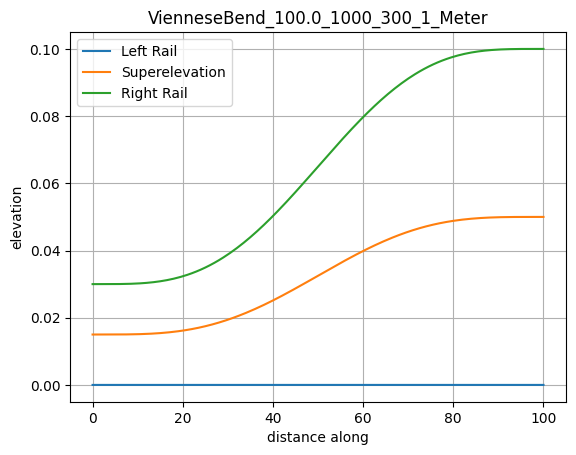

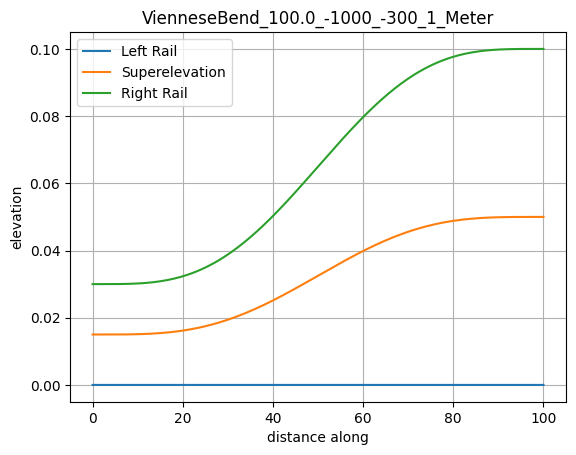

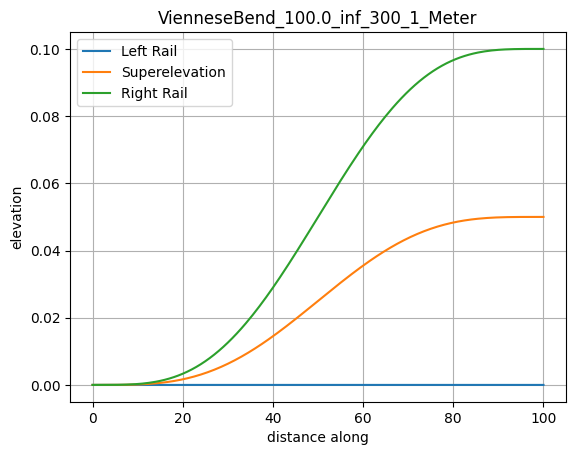

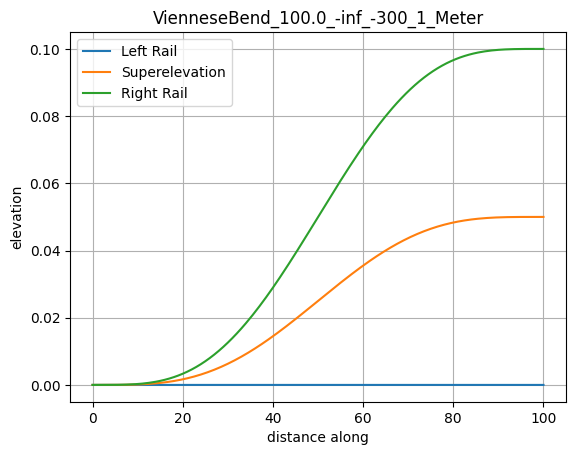

In [1]:
import ifcopenshell, ifcopenshell.geom
import numpy as np
import matplotlib.pyplot as plt
import math

curve_types = ["BlossCurve","ConstantCant","CosineCurve","HelmertCurve","LinearTransition","SineCurve","VienneseBend"]
for curve_type in curve_types:
    test_cases = []
    test_cases.append(curve_type + "_100.0_300_1000_1_Meter")
    test_cases.append(curve_type + "_100.0_-300_-1000_1_Meter")
    test_cases.append(curve_type + "_100.0_300_inf_1_Meter")
    test_cases.append(curve_type + "_100.0_-300_-inf_1_Meter")
    test_cases.append(curve_type + "_100.0_1000_300_1_Meter")
    test_cases.append(curve_type + "_100.0_-1000_-300_1_Meter")
    test_cases.append(curve_type + "_100.0_inf_300_1_Meter")
    test_cases.append(curve_type + "_100.0_-inf_-300_1_Meter")
    
    for test_case in test_cases:
        f = ifcopenshell.open("F:/IFC-Rail-Unit-Test-Reference-Code/alignment_testset/IFC-WithGeneratedGeometry/GENERATED__CantAlignment_" + test_case + ".ifc")

        inst = f.by_type('IfcSegmentedReferenceCurve')[0]
        cant = f.by_type('IfcAlignmentCant')[0]
        #print(cant)
        rail_head = cant.RailHeadDistance
        #print(inst)
        pwf = ifcopenshell.ifcopenshell_wrapper.map_shape(ifcopenshell.geom.settings(),inst.wrapped_data)
        locations = pwf.evaluation_points()
        left = []
        center = []
        right = []
        for u in locations:
            m = pwf.evaluate(u)
            z = np.array(m)[:,3][2] # get the curve elevation
            axis = np.array(m)[:,2] # get the Axis vector
            #print(axis)
            dx = axis[0]
            dy = axis[1]
            ds = math.sqrt(dx*dx+dy*dy) # magnitude of vector in cant plane
            dz = axis[2]
            left.append(-0.5*rail_head*ds/dz + z)
            center.append(z)
            right.append(0.5*rail_head*ds/dz + z)
        
        fig1 = plt.figure().add_subplot()
        fig1.plot(locations,left,label="Left Rail")
        fig1.plot(locations,center,label="Superelevation")
        fig1.plot(locations,right,label="Right Rail")
                    
        fig1.set_title(test_case)
        fig1.legend()#loc="upper left")
        fig1.set_xlabel("distance along")
        fig1.set_ylabel("elevation")
        fig1.grid(True)
        plt.show()
